# Fuzzy C-means
implementing FCM algorithm and implying it on different datasets

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
def read_dataset(path, name):
    df = pd.read_csv(path + name, header=None)
    return df

In [3]:
def initialize_membership_matrix(df, c):
    membership_matrix = np.random.dirichlet(np.ones(c),size=len(df))
    df_membership_matrix = pd.DataFrame(membership_matrix)
    return df_membership_matrix

In [4]:
def find_centroids(df, c, membership_matrix, m):
    centroids = np.zeros((c, len(df.columns)))

    for i in range(c):
        sum_membership = sum(np.power(membership_matrix[i], m))
        for j in range (len(df.columns)):
            c = sum(np.multiply(np.power(membership_matrix[i], m), df[j]))/sum_membership
            centroids[i, j] = c

    return centroids    

In [5]:
def calculate_membership_matrix(df, centroids, m):
    EuclidianDistance = pd.DataFrame()
    inverse_EuclidianDistance = pd.DataFrame()
    membership_matrix = pd.DataFrame()
    for i in range(0, len(centroids)):
        x = 0
        for j in range(0, len(df.columns)):
            x = np.add(x, np.power((df.iloc[ : , j] - centroids[i,j]), 2))
        x = np.sqrt(x)
        EuclidianDistance[len(EuclidianDistance.columns)] = x

    inverse_EuclidianDistance = np.power((1 / EuclidianDistance), 1/(m-1))
    sum = inverse_EuclidianDistance.sum(axis=1)

    for i in range(len(centroids)):
        membership_matrix[len(membership_matrix.columns)] = np.power(1 / EuclidianDistance[i], 1/(m-1)) / sum
    #to handle devison by zero
    membership_matrix.replace(np.inf, 1, inplace=True)

    return membership_matrix   

## Fuzzy C-means algorithm

In [6]:
def c_means(df, c, m, max_it):
    #initialing weights randomly
    membership_matrix = initialize_membership_matrix(df, c)
    centroids = np.zeros((c, len(df.columns)))
    for i in range(max_it):
        temp_centroids = find_centroids(df, c, membership_matrix, m)
        # print(np.array_equal(centroids, temp_centroids))
        if np.array_equal(centroids, temp_centroids):
            # print("clustering finished, it", i)
            minvalue_series = membership_matrix.idxmin(axis = 1)
            return centroids, membership_matrix, minvalue_series
        centroids = temp_centroids
        membership_matrix = calculate_membership_matrix(df, centroids, m)
    minvalue_series = membership_matrix.idxmax(axis = 1)
    return centroids, membership_matrix, minvalue_series

## Cost function
we calculate cost according to distances and memberships

In [7]:
#Calculate cost
def cost_calculate(df, centroids, membership_matrix, m):
    EuclidianDistance = pd.DataFrame()
    cost = 0
    
    for i in range(0, len(centroids)):
        x = 0
        for j in range(0, len(df.columns)):
            x = np.add(x, np.power((df.iloc[ : , j] - centroids[i,j]), 2))
        x = np.sqrt(x)
        EuclidianDistance[len(EuclidianDistance.columns)] = x
    # print(EuclidianDistance)
    # print(membership_matrix)
    cost = ((np.multiply(EuclidianDistance, np.power(membership_matrix, m)).sum(axis=1)).sum())/len(df)
    # print(cost)
    return cost


## ploting elbow method
ploting elbow method per different numbers of c

In [8]:
def plot_cost(df, dataset_name, c, m):
    axis = []
    c_list = []
    for i in range(1,c + 1):

        centroids, membership_matrix, minvalue_seri = c_means(df, i, m, 100)
        cost = cost_calculate(df, centroids, membership_matrix, m)      

        axis.append(cost)
        c_list.append(i)
    
    #plot
    font1 = {'family':'serif','color':'black','size':10}

    plt.xlabel("c", fontdict = font1)
    plt.ylabel("Cost", fontdict = font1)
    plt.title('Cost function per number of clusters, dataset '+str(dataset_name), fontdict = font1)
    
    plt.plot(c_list, axis, label = "Cost Function")
    plt.show()

In [9]:
our_datasets = []
our_datasets.append(read_dataset("datasets/", "data1.csv")) 
our_datasets.append(read_dataset("datasets/", "data2.csv"))
our_datasets.append(read_dataset("datasets/", "data3.csv"))
our_datasets.append(read_dataset("datasets/", "data4.csv"))

## Elbow method
we used elbow method in order to find a good number of clusters.


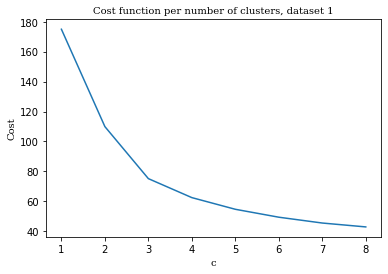

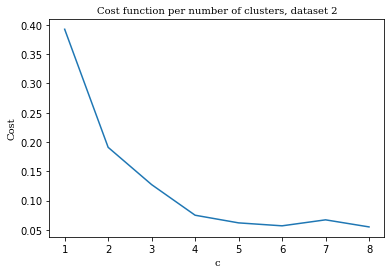

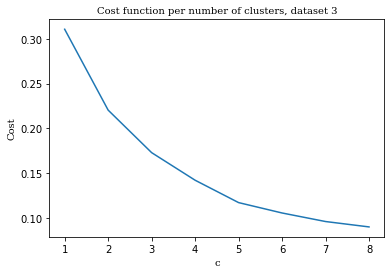

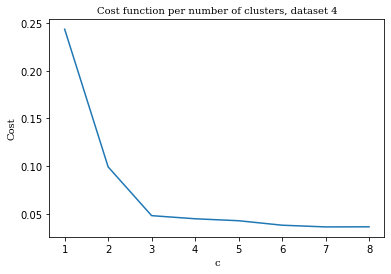

In [10]:
c = 8
m = 1.25

for i in range(0, len(our_datasets)):
    plot_cost(our_datasets[i], i + 1, c, m)


looking at the charts we would find out:
 On dataset 1, c = 3,
 On dataset 2, c = 4,
 On dataset 3, c = 5,
 On dataset 4, c = 3,
can be appropriate.

## Running algortihm with different value m

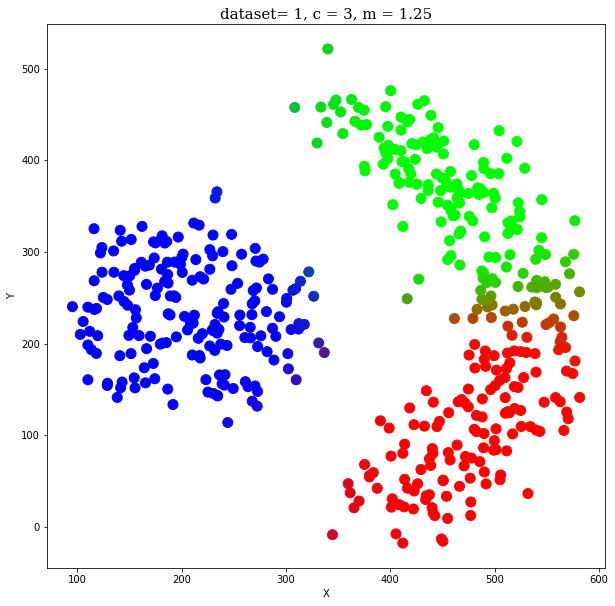

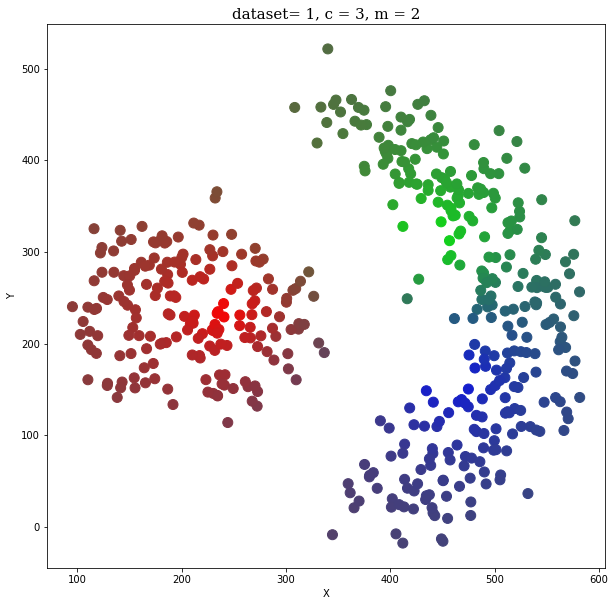

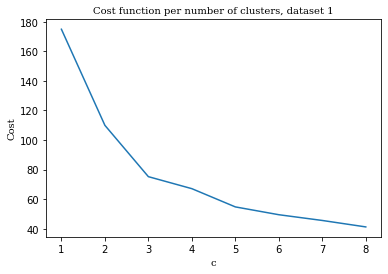

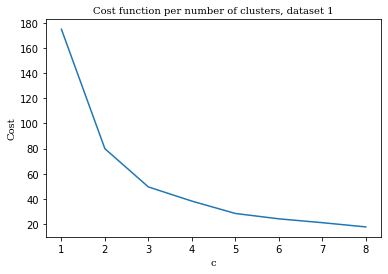

In [20]:
df = our_datasets[0]
c = 3
max_it = 100

font1 = {'family':'serif','color':'black','size':15}

m = 1.25
centroids, membership_matrix, minvalue_seri = c_means(df, c, m, max_it)
df_clustered = df.copy()       
df_clustered.loc[:, "Cluster"] = minvalue_seri

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = df[0], y = df[1], s=100, c= membership_matrix)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('dataset= 1' + ', c = '+ str(c) + ', m = ' + str(m), fontdict = font1)
plt.show()

m = 2
centroids, membership_matrix, minvalue_seri = c_means(df, c, m, max_it)
df_clustered = df.copy()       
df_clustered.loc[:, "Cluster"] = minvalue_seri

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = df[0], y = df[1], s=100, c= membership_matrix)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('dataset= 1' + ', c = '+ str(c) + ', m = ' + str(m), fontdict = font1)
plt.show()

m = 1.25
c = 8
plot_cost(our_datasets[0], 1, c, m)

m = 2
c = 8
plot_cost(our_datasets[0], 1, c, m)

looking at colours, we can find out by increasing m, usually m can be between 1.25 and 2, our clustering got more fuzzy.